# Project 1 - Exploratory Data Analysis - William ELKIESS

### U.S Accidents Dataset (2016-2023)

Dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/data

In this exploratory data anaylsis, we visualise the data and answer questions below:

Temporal Analysis

- What times of the day or days of the week are accidents most likely to occur?

- How do traffic conditions, such peak hours, correlate with accident frequency?

- Are there seasonal patterns in the frequency of accidents? (more accidents in winter or summer?)

- How has the number of accidents changed over the years?

Spatial Analysis

- Which states and cities have the highest and lowest frequency of accidents?

- What types of roads have the highest frequency of accidents?

Weather Conditions and Environmental Factors / Severity

- What weather conditions are most commonly associated with accidents?

- Is there a relationship between temperature and accident severity?

- What is the distribution of the severity of accidents?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm 
import plotly as pt
import seaborn as sns

<span style="color: blue; font-size: 30px;"> 

Data Cleaning

In [3]:
df = pd.read_csv("US_Accidents_March23.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


<span style="color: blue; font-size: 15px;"> 

Check for missing values

In [6]:
missing_values = df.isna().sum()
columns_with_na = missing_values[missing_values > 0]
print(columns_with_na.sort_values(ascending=False))

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64


<Axes: >

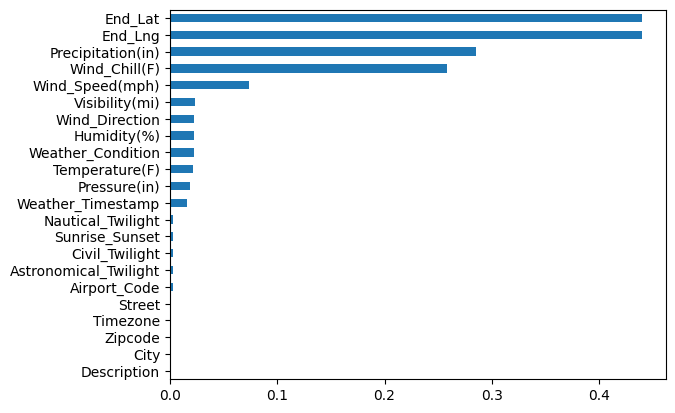

In [7]:
(columns_with_na.sort_values(ascending=True)/len(df)).plot(kind="barh")

<span style="color: blue; font-size: 15px;"> 

- We notice that almost **half** of the data is **missing** for columns **"End_Lat"** and **"End_Lng"**

- **30%** of the data is **missing** for **"Precipitation(in)"** and **"Wind_Chill(F)"**

<span style="color: blue; font-size: 15px;"> 

Check for duplicated rows

In [8]:
dupsum = df.duplicated().sum()
print(dupsum)
# No duplicated rows

0


<span style="color: blue; font-size: 30px;"> 

Spacial Analysis

<span style="color: blue; font-size: 20px;"> 

States, Cities and Roads

In [9]:
print(df.State.unique())
len(df.State.unique())

['OH' 'WV' 'CA' 'FL' 'GA' 'SC' 'NE' 'IA' 'IL' 'MO' 'WI' 'IN' 'MI' 'NJ'
 'NY' 'CT' 'MA' 'RI' 'NH' 'PA' 'KY' 'MD' 'VA' 'DC' 'DE' 'TX' 'WA' 'OR'
 'AL' 'NC' 'AZ' 'TN' 'LA' 'MN' 'CO' 'OK' 'NV' 'UT' 'KS' 'NM' 'AR' 'MS'
 'ME' 'VT' 'WY' 'ID' 'ND' 'MT' 'SD']


49

In [10]:
print('AK' in df['State'].unique())
# Alaska is not present in this dataset

False


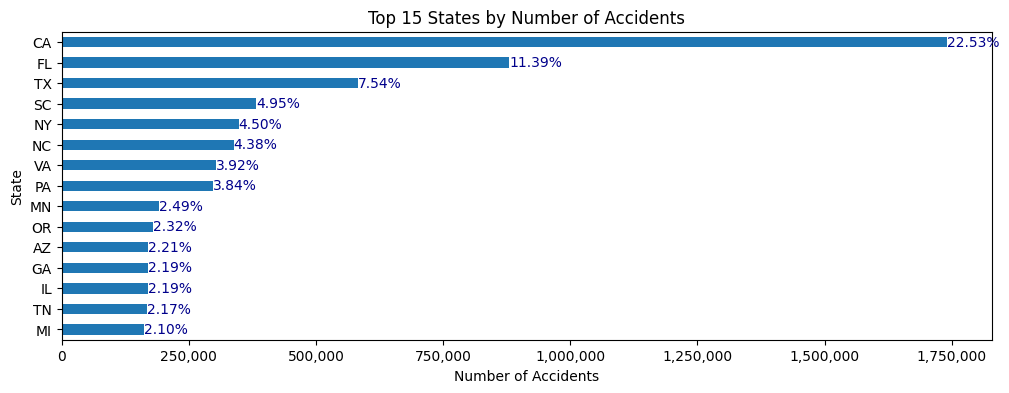

In [11]:
state_counts_head = df['State'].value_counts().head(15).sort_values(ascending=True)
total_accidents_state = df['State'].value_counts().sum()
percentages_state_head = (state_counts_head / total_accidents_state) * 100

plt.figure(figsize=(12, 4))
state_counts_head.plot(kind='barh')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

for i, (count, percentages_state_head) in enumerate(zip(state_counts_head, percentages_state_head)):
    plt.text(count, i, f'{percentages_state_head:.2f}%', va='center', ha='left', color='darkblue', fontsize=10)

plt.xlim(0,)
plt.ylabel('State')
plt.xlabel('Number of Accidents')
plt.title('Top 15 States by Number of Accidents')
plt.show()

<span style="color: blue; font-size: 15px;"> 

**California** has the **largest number of accidents** representing **22.53%** of the total number of accidents in the US from 2016 to 2023, followed by Florida and Texas

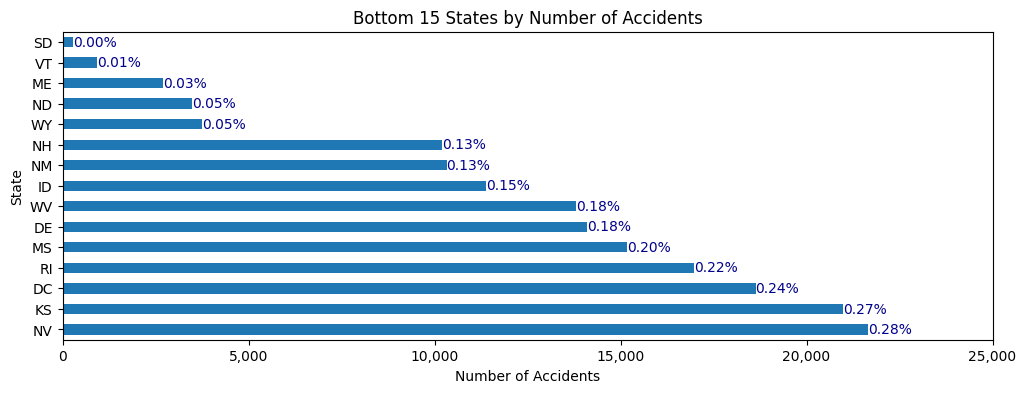

In [12]:
state_counts_tail = df['State'].value_counts().tail(15).sort_values(ascending=False)
percentages_state_tail = (state_counts_tail / total_accidents_state) * 100

plt.figure(figsize=(12, 4))
state_counts_tail.plot(kind='barh')

plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

for i, (count, percentages_state_tail) in enumerate(zip(state_counts_tail, percentages_state_tail)):
    plt.text(count, i, f'{percentages_state_tail:.2f}%', va='center', ha='left', color='darkblue', fontsize=10)

plt.xlim(0, 25000)
plt.ylabel('State')
plt.xlabel('Number of Accidents')
plt.title('Bottom 15 States by Number of Accidents')
plt.show()

In [13]:
df[df['State'] == 'SD'].value_counts().sum()


196

<span style="color: blue; font-size: 15px;"> 

Only **196** recorded accidents in the State of **South Dakota** from 2016 to 2023

In [14]:
print(df.City.unique())
len(df.City.unique())

['Dayton' 'Reynoldsburg' 'Williamsburg' ... 'Ness City' 'Clarksdale'
 'American Fork-Pleasant Grove']


13679

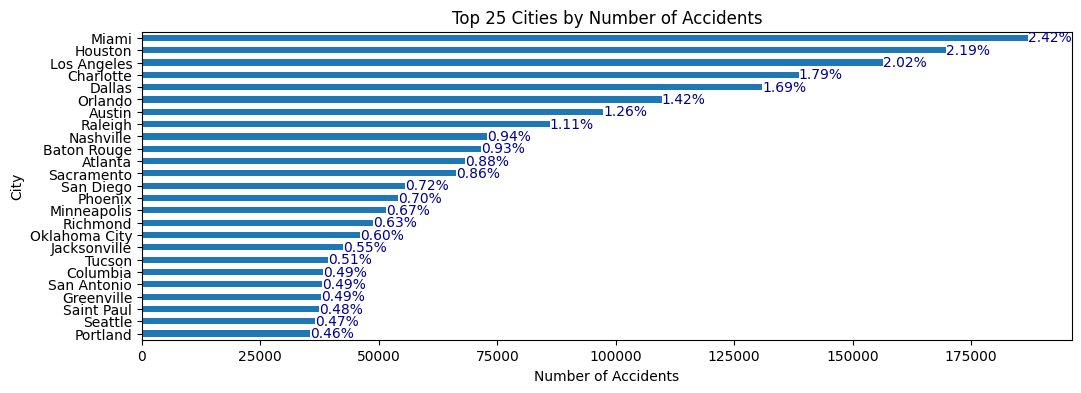

In [15]:
city_counts_head = df['City'].value_counts().head(25).sort_values(ascending=True)
total_accidents_city = df['City'].value_counts().sum()
percentages_city_head = (city_counts_head / total_accidents_city) * 100

plt.figure(figsize=(12, 4))
city_counts_head.plot(kind='barh')

for i, (count, percentages_city_head) in enumerate(zip(city_counts_head, percentages_city_head)):
    plt.text(count, i, f'{percentages_city_head:.2f}%', va='center', ha='left', color='darkblue', fontsize=10)

plt.xlim(0,)
plt.ylabel('City')
plt.xlabel('Number of Accidents')
plt.title('Top 25 Cities by Number of Accidents')
plt.show()

<span style="color: blue; font-size: 15px;"> 

**Miami** (Florida) is the city with the **largest number of accidents** followed closely by Houston (Texas) and Los Angeles (California)

**New York** is **not** part of the top 25 cities with the most number of accidents. We check below its number.

In [16]:
df[df['City'] == 'New York'].shape[0]

21699

<span style="color: blue; font-size: 15px;"> 

**21699** recorded accidents in the city of **New York** (form 2016 to 2023) while it is the **most populated city** in the US

<Figure size 1000x200 with 0 Axes>

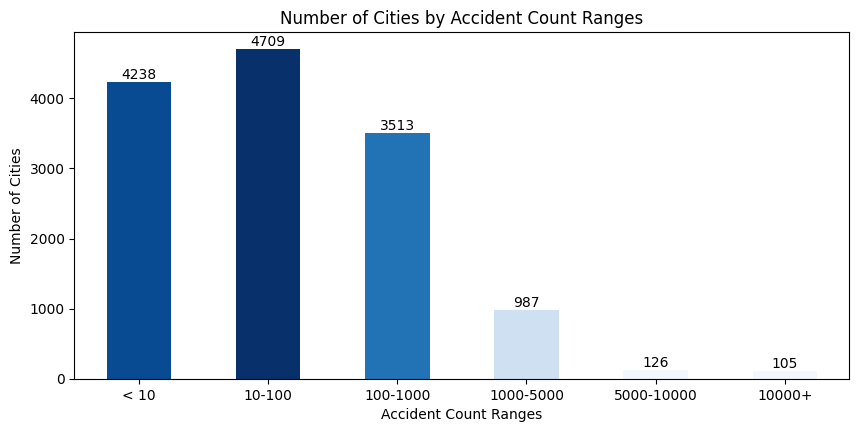

In [17]:
city_accident_counts = df['City'].value_counts()

bins = [0, 10, 100, 1000, 5000, 10000, float('inf')]
labels = ['< 10', '10-100', '100-1000', '1000-5000', '5000-10000', '10000+']

plt.figure(figsize=(10, 2))

city_bins = pd.cut(city_accident_counts, bins=bins, labels=labels, right=False)
city_counts = city_bins.value_counts().reindex(labels, fill_value=0)
normalized_counts = city_counts / city_counts.max()

cmap = cm.get_cmap('Blues', 256)
colors = [cmap(int(value * 255)) for value in normalized_counts]

plt.figure(figsize=(10, 4.5))
ax = city_counts.plot(kind='bar', color=colors)
plt.title("Number of Cities by Accident Count Ranges")
plt.xlabel("Accident Count Ranges")
plt.ylabel("Number of Cities")
plt.xticks(rotation=0)

for i in range(len(city_counts)):
    ax.text(i, city_counts[i] + 0.5, str(city_counts[i]), ha='center', va='bottom')

plt.show()

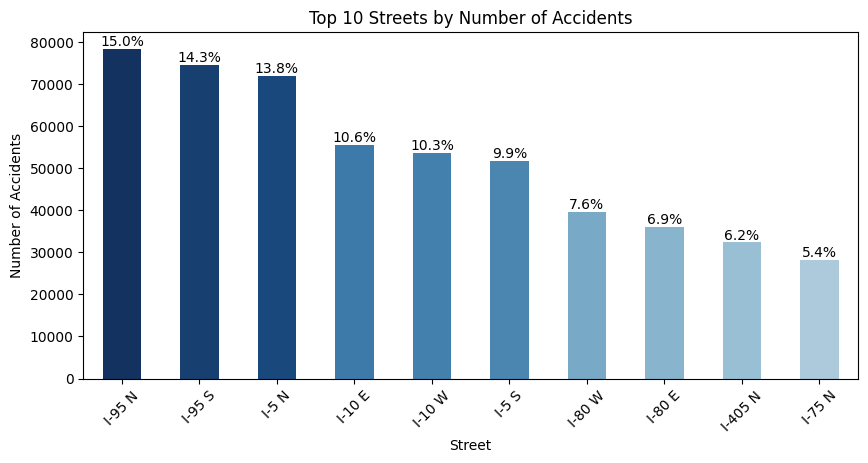

In [18]:
top_ten_streets_df = df['Street'].value_counts().nlargest(10).reset_index()
top_ten_streets_df.columns = ['Street', 'Cases']

total_accidents = top_ten_streets_df['Cases'].sum()
top_ten_streets_df['Percentage'] = (top_ten_streets_df['Cases'] / total_accidents) * 100

normalized_percentages = top_ten_streets_df['Percentage'] / top_ten_streets_df['Percentage'].max()

cmap = cm.get_cmap('Blues', 256)
colors = [cmap(int(value * 255)) for value in normalized_percentages]

plt.figure(figsize=(10, 4.5))
ax = sns.barplot(data=top_ten_streets_df, x='Street', y='Cases', palette=colors, width=0.5)

for i, (cases, pct) in enumerate(zip(top_ten_streets_df['Cases'], top_ten_streets_df['Percentage'])):
    ax.text(i, cases + 1, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Streets by Number of Accidents")
plt.xlabel("Street")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

<span style="color: blue; font-size: 15px;"> 

**15%** of accidents hapenned on **Interstate 95 North** and **14.3%** of accidents happened on **Interstate 95 South**

<span style="color: blue; font-size: 30px;"> 

Temporal Anaylsis

In [19]:
df.Start_Time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7728394 entries, 0 to 7728393
Series name: Start_Time
Non-Null Count    Dtype 
--------------    ----- 
7728394 non-null  object
dtypes: object(1)
memory usage: 59.0+ MB


In [20]:
# Start_Time is an object we need to convert it to a date
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

In [21]:
df.Start_Time.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7728394 entries, 0 to 7728393
Series name: Start_Time
Non-Null Count    Dtype         
--------------    -----         
6985228 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 59.0 MB


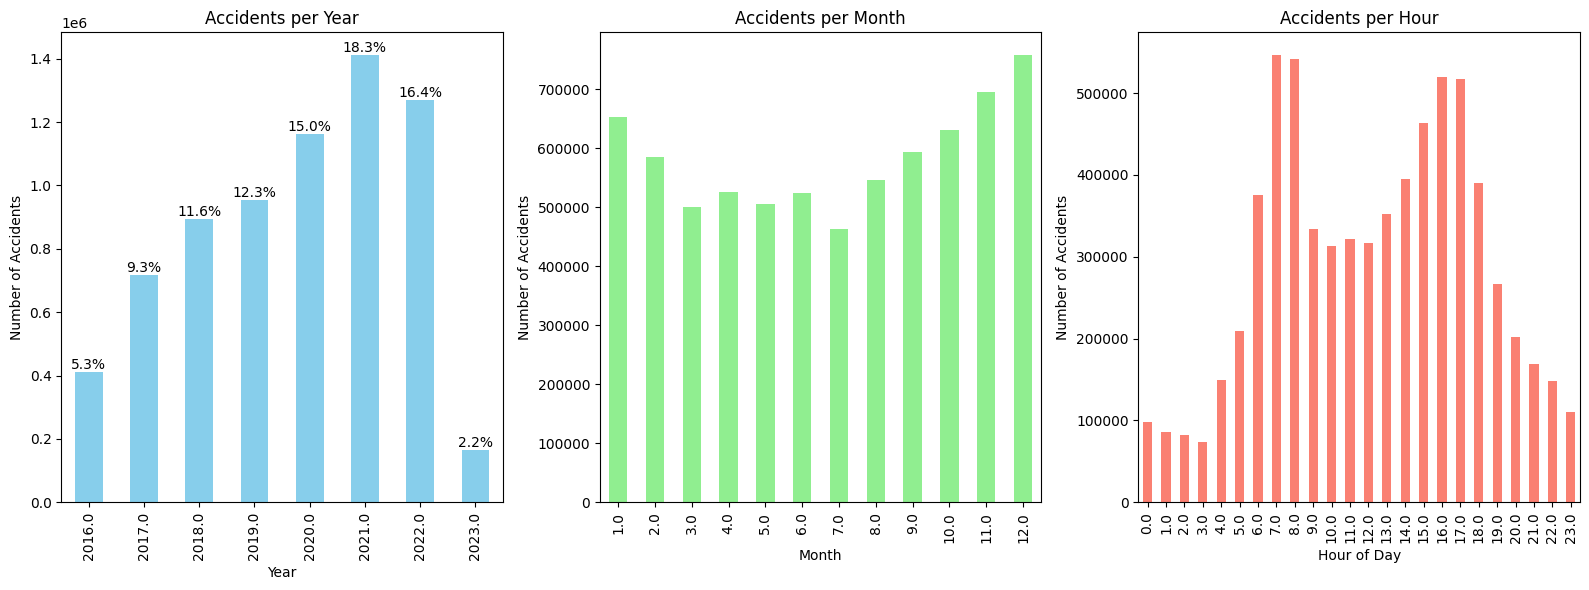

In [22]:
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour

total_accidents = len(df)
accidents_per_year = df['Year'].value_counts().sort_index()
accidents_per_month = df['Month'].value_counts().sort_index()
accidents_per_hour = df['Hour'].value_counts().sort_index()

percentages_per_year = (accidents_per_year / total_accidents) * 100

plt.figure(figsize=(16, 6))

# Accidents per year
plt.subplot(1, 3, 1)
bars = accidents_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Year')

for i in range(len(percentages_per_year)):
    plt.text(i, accidents_per_year.iloc[i] + 0.5, f'{percentages_per_year.iloc[i]:.1f}%', ha='center', va='bottom')

# Accidents per month
plt.subplot(1, 3, 2)
accidents_per_month.plot(kind='bar', color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Month')

# Accidents per hour
plt.subplot(1, 3, 3)
accidents_per_hour.plot(kind='bar', color='salmon')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Hour')

plt.tight_layout()
plt.show()

In [23]:
early_date = df['Start_Time'].sort_values(ascending=True).head(1)
late_date = df['Start_Time'].sort_values(ascending=False).head(1)
print(early_date)
print(late_date)

3574624   2016-01-14 20:18:33
Name: Start_Time, dtype: datetime64[ns]
3662007   2023-03-31 23:30:00
Name: Start_Time, dtype: datetime64[ns]


<span style="color: blue; font-size: 15px;"> 


Year:
- **2021** was the year with the largest number of accidents, **3.5 times** the number of accidents in **2016** and **2 times** the number of accidents in **2017**.
- **2023**: This dataset only contains data up until **March 31st**.

Month:
- There are more accidents during the **colder months**: from **October** to **February**. We will explore later if **temperature** and **humidity** have an impact on the number of accidents.

Hour:
- We notice two spikes: one at **7/8 am** and one at **4/5 pm**. During these periods, traffic is more important due to work hours.


In [24]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Hour'],
      dtype='object')

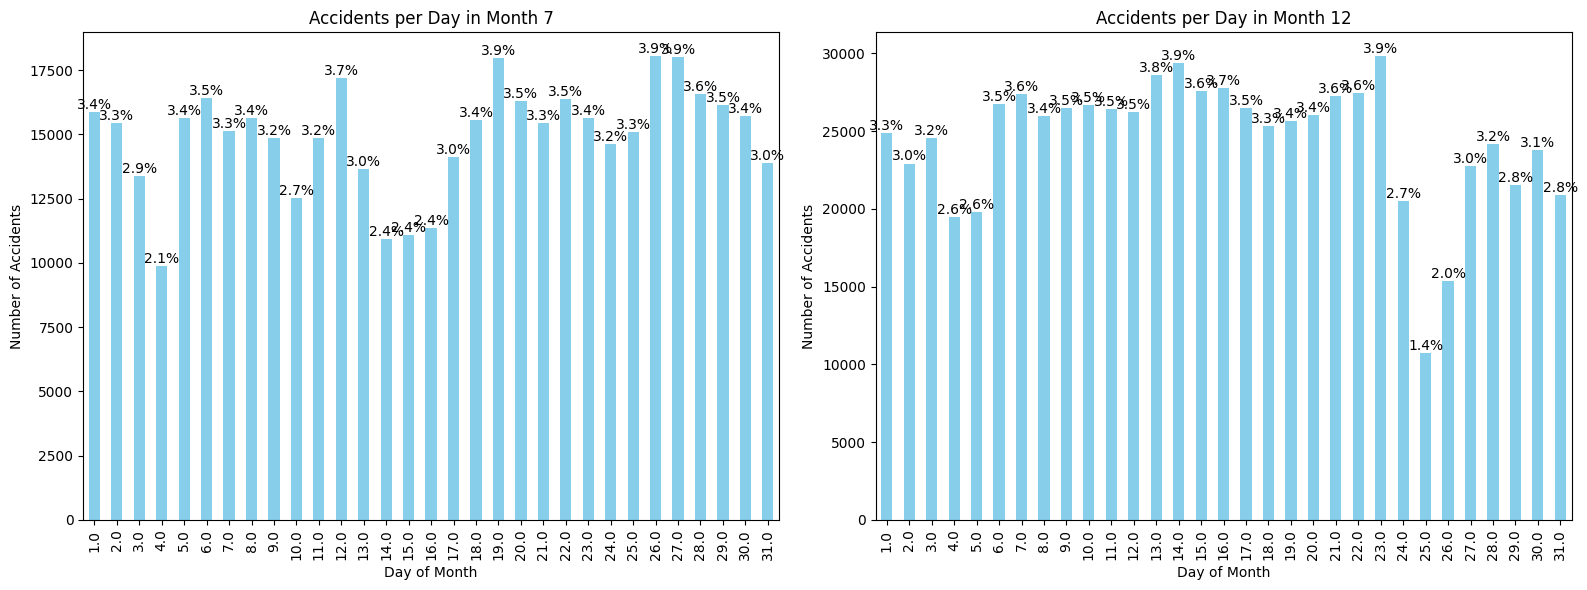

In [25]:
df['Day'] = df['Start_Time'].dt.day
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

months_to_plot = [7, 12]

for index, month in enumerate(months_to_plot):
    # Filter the data for the specific month
    monthly_data = df[df['Month'] == month]
    
    accidents_per_day = monthly_data['Day'].value_counts().sort_index()
    
    ax = axes[index]
    bars = accidents_per_day.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_xlabel('Day of Month')
    ax.set_ylabel('Number of Accidents')
    ax.set_title(f'Accidents per Day in Month {month}')


    total_accidents = len(monthly_data)
    if total_accidents > 0:
        percentages_per_day = (accidents_per_day / total_accidents) * 100
        for i in range(len(percentages_per_day)):
            ax.text(i, accidents_per_day.iloc[i] + 0.5, f'{percentages_per_day.iloc[i]:.1f}%', 
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

<span style="color: blue; font-size: 15px;"> 

In **July**, the number of accidents is the **lowest on the 4th** (public holiday)

In **December**, the number of accidents is **lowest on the 25th** (public holiday)

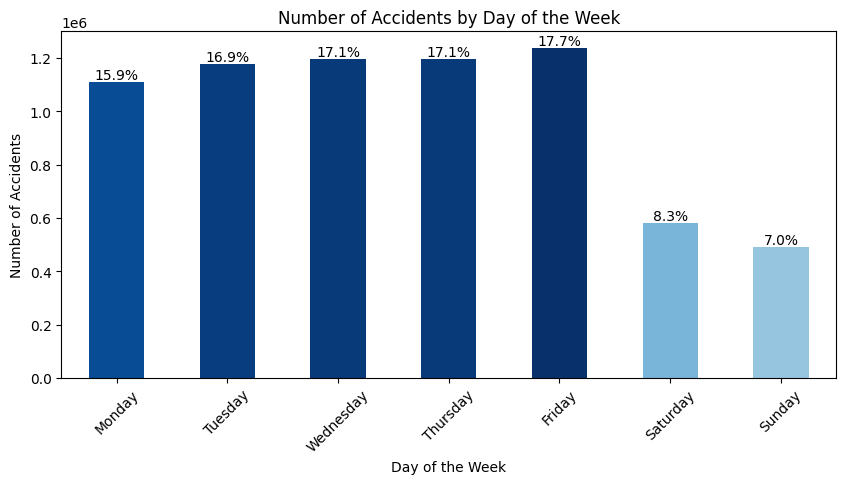

In [26]:
df['DayOfWeek'] = df['Start_Time'].dt.day_name()

accidents_per_day = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
total_accidents = accidents_per_day.sum()
percentages = (accidents_per_day / total_accidents) * 100

normalized_percentages = percentages / percentages.max()

cmap = cm.get_cmap('Blues', 256) 
colors = [cmap(int(value * 255)) for value in normalized_percentages] 

plt.figure(figsize=(10, 4.5))
ax = accidents_per_day.plot(kind='bar', color=colors)
plt.title("Number of Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)

for i in range(len(accidents_per_day)):
    ax.text(i, accidents_per_day[i] + 1, f"{percentages[i]:.1f}%", ha='center', va='bottom')

plt.show()

<span style="color: blue; font-size: 15px;"> 

**Saturday** and **Sunday** have two times **less** accidents than any other day of the week

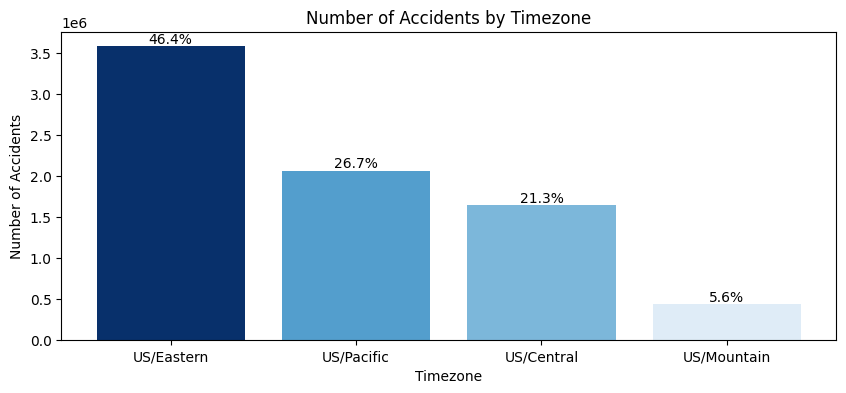

In [27]:
accidents_by_timezone = df['Timezone'].value_counts()

total_accidents_timezone = accidents_by_timezone.sum()
percentages_timezone = (accidents_by_timezone / total_accidents_timezone) * 100
normalized_percentages = percentages_timezone / percentages_timezone.max()

cmap = cm.get_cmap('Blues', 256)  # You can choose any colormap you prefer
colors = [cmap(int(value * 255)) for value in normalized_percentages]

plt.figure(figsize=(10, 4))
bars = plt.bar(accidents_by_timezone.index, accidents_by_timezone.values, color=colors)

for bar, percentage in zip(bars, percentages_timezone):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.xlabel('Timezone')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Timezone')

plt.show()

<span style="color: blue; font-size: 15px;"> 

Almost **half of the accidents** happen in the **Eastern timezone**

<span style="color: blue; font-size: 30px;"> 

Weather Conditions and Environmental Factor

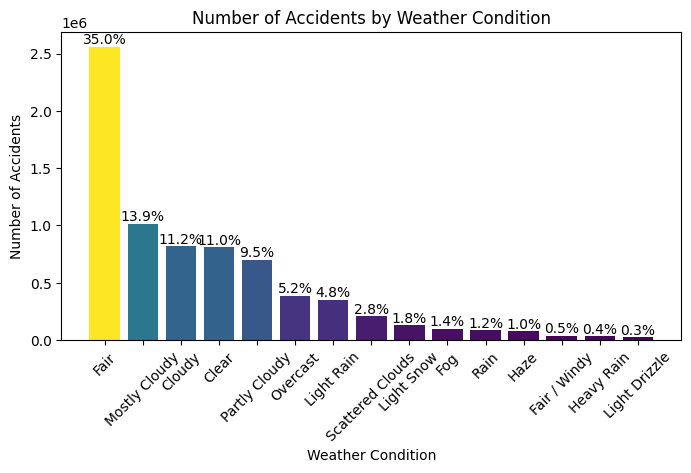

In [28]:
weather_condition_counts = df["Weather_Condition"].value_counts().head(15)

total_accidents_weather = weather_condition_counts.sum()
percentages_weather = (weather_condition_counts / total_accidents_weather) * 100

normalized_counts = weather_condition_counts / weather_condition_counts.max()

cmap = cm.get_cmap('viridis', 256)
colors = [cmap(int(value * 255)) for value in normalized_counts]

plt.figure(figsize=(8, 4))
bars = plt.bar(weather_condition_counts.index, weather_condition_counts.values, color=colors)

for bar, percentage in zip(bars, percentages_weather):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', 
             ha='center', va='bottom')

plt.title("Number of Accidents by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")

plt.xticks(rotation=45)
plt.show()

<span style="color: blue; font-size: 15px;"> 

**Most** accidents happened during **fair, mostly cloudly, cloudy, clear and partly cloudy** weather conditions

<span style="color: blue; font-size: 30px;"> 

Severity

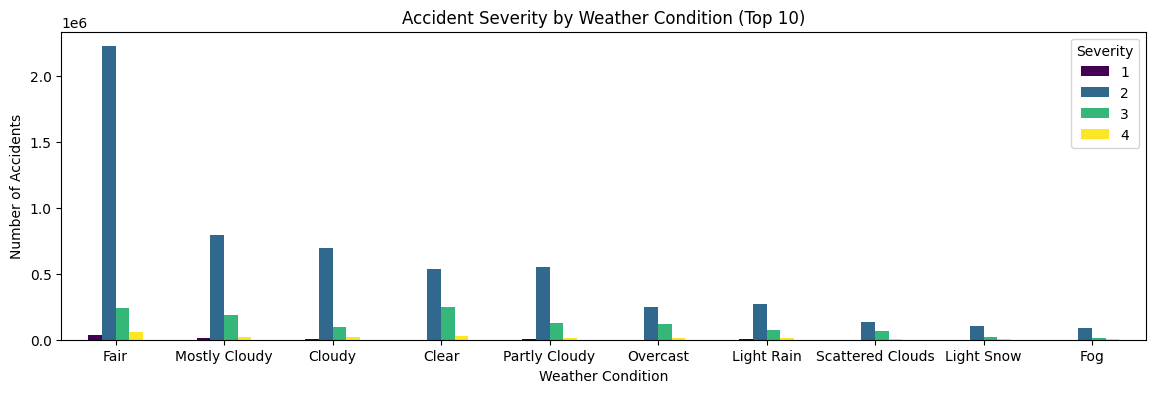

In [29]:
top_10_weather_conditions = df['Weather_Condition'].value_counts().nlargest(10).index
filtered_df = df[df['Weather_Condition'].isin(top_10_weather_conditions)]

severity_counts = filtered_df.groupby(['Weather_Condition', 'Severity']).size().unstack()
severity_counts = severity_counts.loc[severity_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(14,4))
severity_counts.plot(kind='bar', stacked=False, colormap='viridis', ax=plt.gca())
plt.title("Accident Severity by Weather Condition (Top 10)")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.legend(title="Severity")
plt.show()

<span style="color: blue; font-size: 15px;"> 

**Worse** weather conditions does **not** seem to have a significant impact **on the severity** of the accident

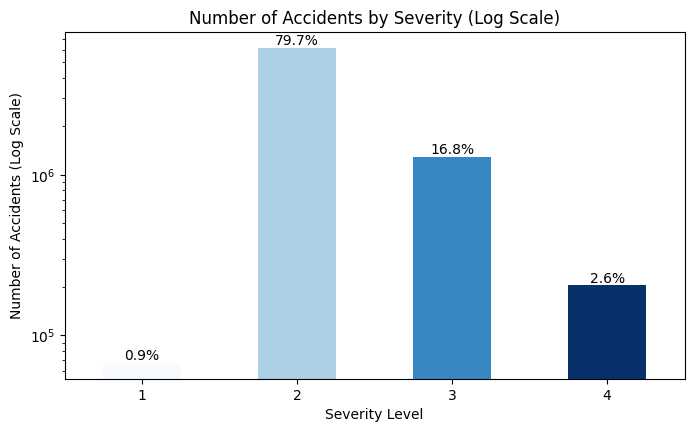

In [30]:
severity_counts = df['Severity'].value_counts().sort_index()

total_accidents = severity_counts.sum()
percentages = (severity_counts / total_accidents) * 100

cmap = cm.get_cmap('Blues', 4)
colors = [cmap(i) for i in range(len(severity_counts))]

plt.figure(figsize=(8, 4.5))
bars = severity_counts.plot(kind='bar', color=colors)

plt.title("Number of Accidents by Severity (Log Scale)")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents (Log Scale)")
plt.yscale("log")
plt.xticks(rotation=0)

for i, (count, pct) in enumerate(zip(severity_counts, percentages)):
    plt.text(i, count + 0.5, f"{pct:.1f}%", ha='center', va='bottom')

plt.show()

<span style="color: blue; font-size: 15px;"> 

**80%** of accidents are of severity level **2**

In [31]:
print(df['Temperature(F)'].head())

0    36.9
1    37.9
2    36.0
3    35.1
4    36.0
Name: Temperature(F), dtype: float64


In [32]:
df['Temperature(F)'].isna().sum()

163853

In [33]:
df = df.dropna(subset=['Temperature(F)'])
df['Temperature(F)'] = df['Temperature(F)'].round().astype(int)

In [34]:
df['Temperature(F)'].head()

0    37
1    38
2    36
3    35
4    36
Name: Temperature(F), dtype: int32

In [35]:
print(df['Temperature(F)'].min())
print(df['Temperature(F)'].max())

-89
207


In [36]:
below_minus_40 = df[df['Temperature(F)'] < -40].shape[0]
above_120 = df[df['Temperature(F)'] > 120].shape[0]
print(f"Rows with temperature below -40: {below_minus_40}")
print(f"Rows with temperature above 120: {above_120}")

Rows with temperature below -40: 25
Rows with temperature above 120: 61


In [37]:
# Remove rows with temperature below -40 or above 120
df = df[~((df['Temperature(F)'] < -40) | (df['Temperature(F)'] > 120))]

df.reset_index(drop=True, inplace=True)

In [38]:
print(df['Temperature(F)'].min())
print(df['Temperature(F)'].max())

-40
120


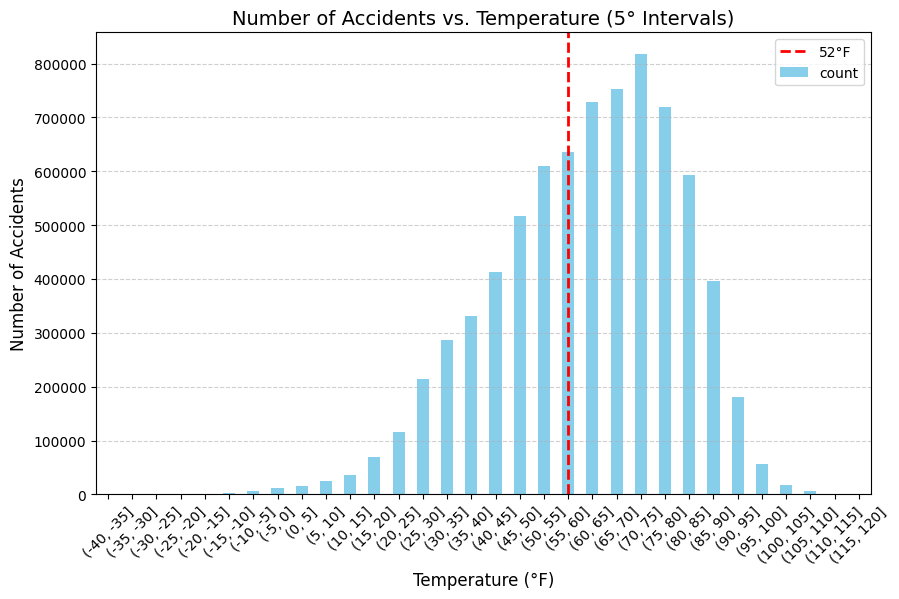

In [39]:
temperature_bins = pd.cut(df['Temperature(F)'], bins=range(int(df['Temperature(F)'].min()), int(df['Temperature(F)'].max()) + 5, 5))

bin_counts = temperature_bins.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bin_counts.plot(kind='bar', color='skyblue')

# Add a vertical line at 52 degrees
bin_index = bin_counts.index.get_loc(pd.Interval(50, 55))
bin_position = bin_index + 1

plt.axvline(x=bin_position, color='red', linestyle='--', linewidth=2, label='52°F')

plt.title('Number of Accidents vs. Temperature (5° Intervals)', fontsize=14)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.legend()

plt.show()

<span style="color: blue; font-size: 15px;"> 

We added a verical line around **52°F** which represents the **average temperature** in the United States across **all states** (without Alaska). This number was found on google

The number of accidents vs temperature is not centered around the average temperature. There are **more** accidents in **warmer conditions**

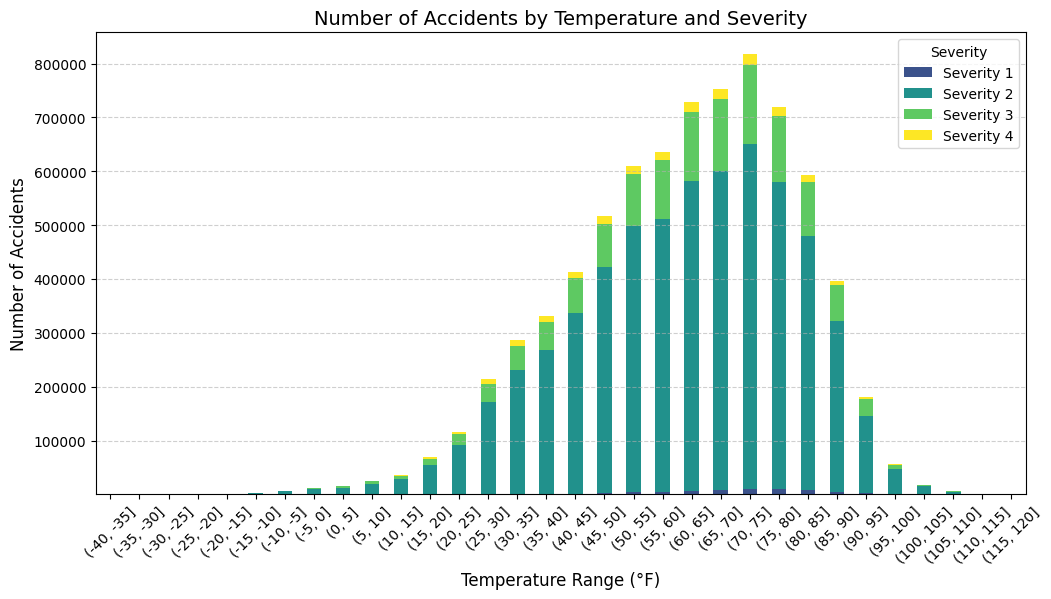

In [40]:
temperature_bins = pd.cut(df['Temperature(F)'], bins=range(int(df['Temperature(F)'].min()), int(df['Temperature(F)'].max()) + 5, 5))

severity_counts = df.groupby([temperature_bins, 'Severity']).size().unstack(fill_value=0)

cmap = cm.viridis

colors = cmap(severity_counts.columns / 4)

severity_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors)


plt.title('Number of Accidents by Temperature and Severity', fontsize=14)
plt.xlabel('Temperature Range (°F)', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Severity', loc='upper right', labels=['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()

<span style="color: blue; font-size: 15px;"> 

The temperature does **not** seem to have a significant impact **on the severity** of the accident, although severity 1 accidents occur mostly in mid range temperatures